In [3]:
import matplotlib.pyplot as plt
import itertools
import random
import copy
import itertools
import numpy as np

In [29]:
class Schelling:
    
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races):
        self.width = width
        self.height = height
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
        
    def populate(self):
        self.empty_houses = []
        self.agents = {}
        self.all_houses = list(itertools.product(range(self.width), range(self.height)))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.empty_ratio * len(self.all_houses))
        self.empty_houses = self.all_houses[:self.n_empty]
        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_races = []
        for i in range(self.races):
            houses_by_races.append(self.remaining_houses[i::self.races])  
            race = [i]*len(houses_by_races[i])
            self.agents.update(zip(houses_by_races[i], race))
            
    def plot_city(self):
        fig, ax = plt.subplots(figsize=(self.width*0.5, self.height*0.5))
        ax.set_xlim([-1, self.width-1])
        ax.set_ylim([-1, self.height-1])
        ax.set_xticks(np.arange(0, self.width, 1))
        ax.set_yticks(np.arange(0, self.height, 1))
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position('none')
        ax.grid()
        cols = ['r', 'g', 'b', 'c', 'm', 'y', 'k']           
        for key, value in self.agents.items():           
            x = key[0]-0.5
            y = key[1]-0.5
            ax.scatter(x, y, c=cols[value], marker='s', s=500)
        
    def is_unsatisfied(self, location):
        race = self.agents[location]
        locs = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
        same_race = 0
        diff_race = 0
        x = location[0]-1
        y = location[1]-1
        for i in locs:
            nbor = []
            nbor.append(i[0] + x)
            nbor.append(i[1] + y)
            nbor_tup = tuple(nbor)
            if nbor_tup in self.agents:
                if self.agents[nbor_tup] == race:
                    same_race += 1
                else:
                    diff_race += 1
        if same_race == diff_race == 0:
            return False
        elif same_race/(same_race + diff_race) < self.similarity_threshold:
            return True
        else:
            return False  
    
    def update(self):
        sim_indices = []
        for j in range(self.n_iterations):
            for i in self.agents:
                if self.is_unsatisfied(i) == True:
                    new = random.choice(self.empty_houses)
                    self.agents[new] = self.agents[i]
                    self.empty_houses.append(i)
                    self.empty_houses.remove(new)
                    del self.agents[i]
            sim_indices.append(self.similarity())
            if j==0 or j==self.n_iterations-1:
                self.plot_city()
                print(self.similarity())
        self.sim_graph(sim_indices)
    
    def similarity(self):
        sim_index = 0
        for i in self.agents:
            race = self.agents[i]
            locs = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
            same_race = 0
            diff_race = 0
            x = i[0]-1
            y = i[1]-1
            for i in locs:
                nbor = []
                nbor.append(i[0] + x)
                nbor.append(i[1] + y)
                nbor_tup = tuple(nbor)
                if nbor_tup in self.agents:
                    if self.agents[nbor_tup] == race:
                        same_race += 1
                    else:
                        diff_race += 1
            if same_race == diff_race == 0:
                sim_index += 0
            else:
                sim_index += (same_race/(same_race + diff_race))
        return sim_index/len(self.agents)  
    
    def sim_graph(self, sim_indices):
        fig, ax = plt.subplots(figsize=(self.width*0.5, self.height*0.5))
        for i in range(len(sim_indices)):
            ax.scatter(i, sim_indices[i])
        ax.plot(range(len(sim_indices)), sim_indices)

0.2917833800186743
0.9341363211951448


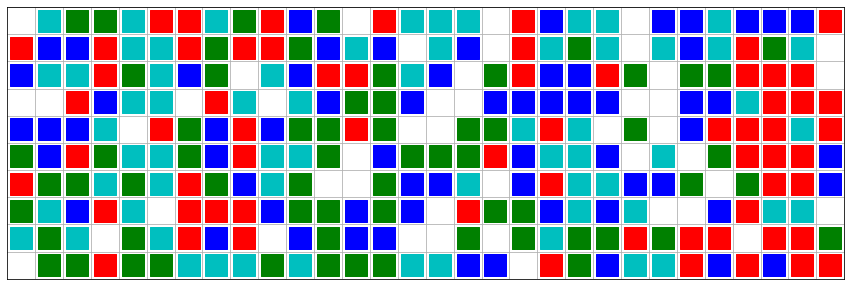

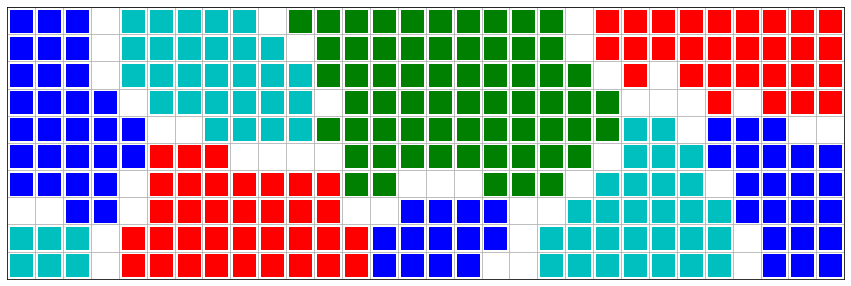

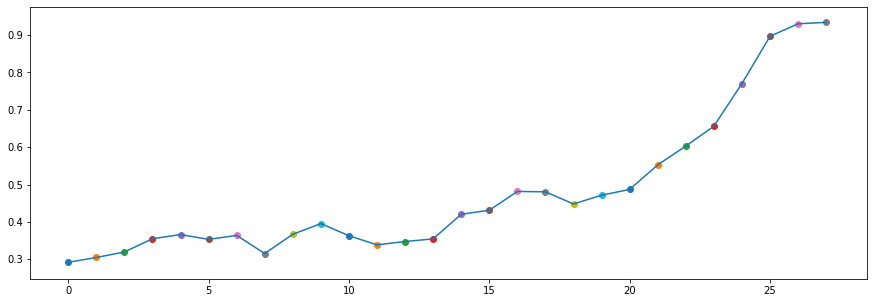

In [31]:
test = Schelling(30, 10, 0.15, 0.60, 28, 4)
test.populate()
test.update() 

In [9]:
print(test.similarity())

0.46264239028944915


In [4]:
import numpy as np
t = np.arange(11)
print(t[0::2])

[ 0  2  4  6  8 10]


In [5]:
    remaining = [(3, 9), (2, 8), (1, 7), (2, 5), (6, 7), (5, 0), (4, 0), (8, 0)]
    houses_by_races = []   
    agents = {}
    for i in range(5):
            houses_by_races.append(remaining[i::5])  
            print(houses_by_races)
            races = [i]*len(houses_by_races[i-1])
            agents = dict(zip(houses_by_races[i-1], races))
            
    print(agents)

[[(3, 9), (5, 0)]]
[[(3, 9), (5, 0)], [(2, 8), (4, 0)]]
[[(3, 9), (5, 0)], [(2, 8), (4, 0)], [(1, 7), (8, 0)]]
[[(3, 9), (5, 0)], [(2, 8), (4, 0)], [(1, 7), (8, 0)], [(2, 5)]]
[[(3, 9), (5, 0)], [(2, 8), (4, 0)], [(1, 7), (8, 0)], [(2, 5)], [(6, 7)]]
{(2, 5): 4}


In [6]:
region = list(itertools.product(range(3), range(3)))
region.pop(4)
print(region)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]


In [7]:
locs = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
nbor = []
for i in locs:
    nbor = []
    nbor.append(i[0]+1)
    nbor.append(i[1]+1)
    print(nbor)

[1, 1]
[1, 2]
[1, 3]
[2, 1]
[2, 3]
[3, 1]
[3, 2]
[3, 3]
